In this notebook we download the salary dataset to construct prediction models.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

Lets download the dataset

### Load Data From CSV File  

In [3]:
df = pd.read_csv('C:/Users/taihs/OneDrive/Documents/SGunited Data Analyst/capstone 3/salary_new.csv')
df.head()
df.corr()

""


In [119]:
df.shape

(8383, 6)

## Convert Categorical features to numerical values

Lets convert male to 0 and female to 1:


In [120]:
df['gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
df.head()

,age,gender,country,education,job,salary
0,30-34,0,United States of America,Master’s degree,Data Engineer,"100,000-124,999"
1,35-39,0,Argentina,Bachelor’s degree,Software Engineer,"0-29,999"
2,30-34,0,United States of America,Master’s degree,Data Scientist,"125,000-149,999"
3,35-39,0,Germany,Doctoral degree,Data Scientist,"70,000-79,999"
4,35-39,0,United States of America,Doctoral degree,Research Scientist,"30,000-39,999"


## One Hot Encoding  
#### How about education?

#### Feature befor One Hot Encoding

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [121]:
Feature = df[['gender']]
Feature = pd.concat([Feature,pd.get_dummies(df['age'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['job'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['country'])], axis=1)
Feature.head()


,gender,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,...,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America,Viet Nam
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Feature selection

Lets defind feature sets, X:

In [122]:
X = Feature
X[0:5]

,gender,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,...,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America,Viet Nam
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


What are our lables?

In [123]:
y = df['salary'].values
y[0:5]

array(['100,000-124,999', '0-29,999', '125,000-149,999', '70,000-79,999',
       '30,000-39,999'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [37]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43715607, -0.23479568, -0.4073388 , -0.53859935,  2.12062471,
        -0.39410625, -0.31620702, -0.27314066, -0.22296187, -0.15911632,
        -0.16720738, -0.06836678, -0.63205946, -0.4379301 , -0.11583938,
         1.09267026, -0.09307641, -0.20904593, -0.18794075, -0.2811264 ,
        -0.10417546, -0.39994465,  4.87120248, -0.59742081, -0.33415008,
        -0.26446657, -0.34701923, -0.46189275, -0.16185363, -0.08975945,
        -0.11636704, -0.06924188, -0.05992933, -0.0578903 , -0.22148406,
        -0.14473254, -0.07976556, -0.13725201, -0.10931948, -0.09564994,
        -0.14343859, -0.16493195, -0.04638775, -0.08490547, -0.55681994,
        -0.11316613, -0.09043225, -0.0578903 , -0.08200677, -0.13993431,
        -0.19856897, -0.08839897, -0.07428036, -0.12253132, -0.08051938,
        -0.04507809, -0.10649099, -0.15950995, -0.11741563, -0.08200677,
        -0.06836678, -0.10358884, -0.09501286, -0.06748055, -0.0628657 ,
        -0.19856897, -0.06748055, -0.08975945, -0.0

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6706, 83) (6706,)
Test set: (1677, 83) (1677,)


In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [126]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.45915325, 0.52653548, 0.53548002, 0.53905784, 0.54502087,
       0.5515802 , 0.55635063, 0.56112105, 0.56350626])

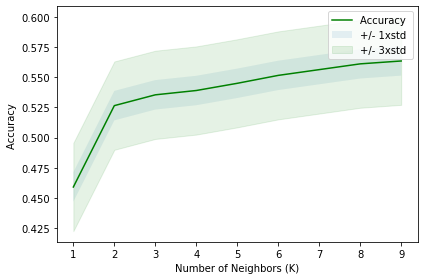

In [127]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## Random Tree

In [128]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
Rd = RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
Rd.fit(X_train,y_train)

predRd=Rd.predict(X_test)
print (predRd [0:5])
print (y_test [0:5])


['90,000-99,999' '30,000-39,999' '0-29,999' '0-29,999' '0-29,999']
['50,000-59,999' '150,000-199,999' '70,000-79,999' '0-29,999' '0-29,999']


# Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [131]:
predTree = Tree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

['0-29,999' '150,000-199,999' '0-29,999' '0-29,999' '0-29,999']
['50,000-59,999' '150,000-199,999' '70,000-79,999' '0-29,999' '0-29,999']


# Support Vector Machine

In [132]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [133]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['0-29,999', '0-29,999', '0-29,999', '0-29,999', '0-29,999'],
      dtype=object)

# Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [135]:
yhat = LR.predict(X_test)
yhat [0:5]

array(['0-29,999', '0-29,999', '0-29,999', '0-29,999', '0-29,999'],
      dtype=object)

# Model Evaluation using Test set

In [136]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

### Load Test set for evaluation 

In [137]:
test_df = pd.read_csv('C:/Users/taihs/OneDrive/Documents/SGunited Data Analyst/capstone 3/salary_new.csv')
test_df.head()

,age,gender,country,education,job,salary
0,30-34,Male,United States of America,Master’s degree,Data Engineer,"100,000-124,999"
1,35-39,Male,Argentina,Bachelor’s degree,Software Engineer,"0-29,999"
2,30-34,Male,United States of America,Master’s degree,Data Scientist,"125,000-149,999"
3,35-39,Male,Germany,Doctoral degree,Data Scientist,"70,000-79,999"
4,35-39,Male,United States of America,Doctoral degree,Research Scientist,"30,000-39,999"


In [138]:
test_df['gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
test_df.head()

,age,gender,country,education,job,salary
0,30-34,0,United States of America,Master’s degree,Data Engineer,"100,000-124,999"
1,35-39,0,Argentina,Bachelor’s degree,Software Engineer,"0-29,999"
2,30-34,0,United States of America,Master’s degree,Data Scientist,"125,000-149,999"
3,35-39,0,Germany,Doctoral degree,Data Scientist,"70,000-79,999"
4,35-39,0,United States of America,Doctoral degree,Research Scientist,"30,000-39,999"


In [139]:
Feature = test_df[['gender']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['age'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(test_df['job'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(test_df['country'])], axis=1)
X = Feature
y = test_df['salary'].values
##X= preprocessing.StandardScaler().fit(X).transform(X)

In [140]:
neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
yhat1 = neigh.predict(X)
yhat2 = Tree.predict(X)
yhat3 = clf.predict(X)
yhat4 = LR.predict(X)
yhat5 = Rd.predict(X)

In [141]:
print ('KNN F1-score: ' ,f1_score(y, yhat1, average='weighted'))
print ('Decision Tree F1-score: ',f1_score(y, yhat2, average='weighted'))
print ('SVM F1-score: ',f1_score(y, yhat3, average='weighted') )
print ('Logistic Reg F1-score: ',f1_score(y, yhat4, average='weighted') )
print ('Random Tree F1-score: ',f1_score(y, yhat5, average='weighted') )
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y, yhat5))

data = {'Model':['Random Tree','KNN', 'SVM', 'Decision Tree', 'Logistic'], 
        'F1 Score':[0.7414027311822854, 0.5353443078469671, 0.5150430284539621, 0.49364310425158053, 0.42877020068265154]} 
  
F1score = pd.DataFrame(data)

KNN F1-score:  0.5353443078469671
Decision Tree F1-score:  0.49364310425158053
SVM F1-score:  0.5150430284539621
Logistic Reg F1-score:  0.42877020068265154
Random Tree F1-score:  0.7414027311822854
ACCURACY OF THE MODEL:  0.7556960515328641


In [142]:
import pickle

with open('neigh.pickle', 'wb') as f:
     pickle.dump(neigh, f)
with open('Tree.pickle', 'wb') as f:
     pickle.dump(Tree, f)
with open('clf.pickle', 'wb') as f:
     pickle.dump(clf, f)
with open('LR.pickle', 'wb') as f:
     pickle.dump(LR, f)
with open('Random.pickle', 'wb') as f:
     pickle.dump(Rd, f)

In [143]:
import pandas as pd
import numpy as np
import pickle
##from sklearn import preprocessing

test_df = pd.read_csv('C:/Users/taihs/OneDrive/Documents/SGunited Data Analyst/capstone 3/salary_predict.csv')
test_df['gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
Feature = test_df[['gender']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['age'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(test_df['job'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(test_df['country'])], axis=1)

X = Feature
##X= preprocessing.StandardScaler().fit(X).transform(X)
##X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

with open('C:/Users/taihs/OneDrive/Documents/SGunited Data Analyst/capstone 3/neigh.pickle','rb') as model_file:
     neigh = pickle.load(model_file)
with open('C:/Users/taihs/OneDrive/Documents/SGunited Data Analyst/capstone 3/Tree.pickle','rb') as model_file:
     Tree = pickle.load(model_file)
with open('C:/Users/taihs/OneDrive/Documents/SGunited Data Analyst/capstone 3/clf.pickle','rb') as model_file:
     clf = pickle.load(model_file)
with open('C:/Users/taihs/OneDrive/Documents/SGunited Data Analyst/capstone 3/LR.pickle','rb') as model_file:
     LR = pickle.load(model_file)
with open('C:/Users/taihs/OneDrive/Documents/SGunited Data Analyst/capstone 3/Random.pickle','rb') as model_file:
     Rd = pickle.load(model_file)
        
yhat1 = Rd.predict(X)
result1 = pd.concat([test_df, pd.DataFrame(yhat1)], axis=1)
result1.rename(columns = {0:'predicted salary for Random Tree'}, inplace = True) 
result1['gender'].replace(to_replace=[0, 1], value=['Male','Female'],inplace=True)

yhat1 = neigh.predict(X)
result1 = pd.concat([result1, pd.DataFrame(yhat1)], axis=1)
result1.rename(columns = {0:'predicted salary for KNN'}, inplace = True) 

yhat1 = Tree.predict(X)
result1 = pd.concat([result1, pd.DataFrame(yhat1)], axis=1)
result1.rename(columns = {0:'predicted salary for Decision Tree'}, inplace = True) 

yhat1 = clf.predict(X)
result1 = pd.concat([result1, pd.DataFrame(yhat1)], axis=1)
result1.rename(columns = {0:'predicted salary for SVM'}, inplace = True) 

yhat1 = LR.predict(X)
result1 = pd.concat([result1, pd.DataFrame(yhat1)], axis=1)
result1.rename(columns = {0:'predicted salary for Logistic Regression'}, inplace = True) 

data = {'Model':['Random Tree','KNN', 'SVM', 'Decision Tree', 'Logistic'], 
        'F1 Score':[0.5474621092341404, 0.2669620479984838, 0.22336967163647195, 0.09287632824073264, 0.08811338140547487],
        'New F1 Score':[0.7414027311822854, 0.5353443078469671, 0.5150430284539621, 0.49364310425158053, 0.42877020068265154]}

F1score = pd.DataFrame(data)

In [32]:
from sklearn.metrics import log_loss
yhat_prob = LR.predict_proba(X)
print ('Logistic Reg Logloss: ', log_loss(y, yhat_prob))

Logistic Reg Logloss:  3.387769797168502


In [33]:
print ('KNN jaccard: ', jaccard_score(y, yhat1,labels=None,average='weighted'))
print ('Decision Tree jaccard: ', jaccard_score(y, yhat2,labels=None, average='weighted'))
print ('SVM jaccard: ', jaccard_score(y, yhat3,labels=None,average='weighted'))
print ('Logistic Reg jaccard: ', jaccard_score(y, yhat4,labels=None,average='weighted'))
#jac_sc=jaccard_score(y_test,yhat,labels=None,average='weighted',sample_weight=None)

KNN jaccard:  0.04345130785132453
Decision Tree jaccard:  0.018048821656871248
SVM jaccard:  0.04300346345876174
Logistic Reg jaccard:  0.027364621429625306


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |